# Data Analysis and Visualization with SQLite and Pandas

This notebook demonstrates how to extract data from an SQLite database, clean the data, perform basic analysis, and create visualizations using Pandas and Matplotlib.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt 


## Connecting to the Database
We connect to the SQLite database file (`sales_data.db`) to retrieve order and customer data.


In [ ]:
db_file = '../data/sales_data.db'
conn = sqlite3.connect(db_file)
print(f"Connected to the database {db_file}.")

Connected to the database ../data/sales_data.db.


# Example 1: Data Extraction using SQL and Loading into Pandas

This example demonstrates how to extract data by writing an SQL query that combines information from two tables (`orders` and `customers`) using an SQL `JOIN`. The data is then loaded into a Pandas DataFrame for further analysis. 

### Steps:
1. Write an SQL query to fetch columns such as `order_id`, `order_date`, customer details (`first_name`, `last_name`, `email`), and `total_amount` from the `orders` table joined with the `customers` table.
2. Use `pandas.read_sql_query` to execute the SQL query and convert the resulting data into a Pandas DataFrame.
3. Display the extracted data by printing the first 5 rows of the DataFrame using `.head()`.

This is useful for combining and transforming data from relational databases into a tabular format compatible with Python for analysis or visualization.


In [ ]:
# --- Example 1: Data extraction using SQL and loading into Pandas ---
print("\n--- Extracting orders and customers ---")

# Writing the SQL query to join orders and customers tables
query_orders_customers = """
SELECT
    o.order_id,
    o.order_date,
    c.first_name,
    c.last_name,
    c.email,
    o.total_amount 
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id;
"""

# Executing the query and loading the result into a Pandas DataFrame
df_orders = pd.read_sql_query(query_orders_customers, conn)

# Displaying the extracted data
print("Extracted orders and customers data:")
print(df_orders.head())  # Display the first 5 rows



--- Extracting orders and customers ---
Extracted orders and customers data:
   order_id  order_date first_name   last_name                 email  \
0      1001  2023-10-20        Ana     Popescu       ana.p@email.com   
1      1002  2023-10-21     Bogdan     Ionescu    bogdan.i@email.com   
2      1003  2023-11-05        Ana     Popescu       ana.p@email.com   
3      1004  2023-11-10   Cristina  Diaconescu  cristina.d@email.com   
4      1005  2023-11-15        Dan   Georgescu       dan.g@email.com   

   total_amount  
0        4650.0  
1         150.0  
2         550.0  
3        1200.0  
4        4500.0  


# Example 2: Data Cleaning with Pandas

This example demonstrates how to clean data in a Pandas DataFrame. Cleaning involves handling missing values and ensuring columns have the correct data types for further analysis.

### Steps:
1. **Identify Missing Values**:
   - Use `.isnull().sum()` to check for missing values in the DataFrame columns.

2. **Convert 'order_date' to `datetime`**:
   - Convert the `order_date` column into a `datetime` format using `pd.to_datetime()`.
   - Use `errors='coerce'` to replace invalid dates with `NaT` (*Not a Time*).

3. **Handle Missing Values**:
   - Replace missing values in `total_amount` with a default value (0 in this case).
   - Investigate why values are missing in a real project (e.g., recalculation errors or data inconsistencies).

4. **Recheck Missing Values**:
   - Verify that all missing values have been handled after cleaning.

5. **Verify Data Types**:
   - Print the data types of the columns using `.dtypes` to confirm the successful conversion of the `order_date` column to a `datetime` format.


In [ ]:
# --- Example 2: Data Cleaning with Pandas ---
print("\n--- Data Cleaning ---")

# Checking for missing values
print("Missing values before cleaning:")
print(df_orders.isnull().sum())

# Convert the 'order_date' column to datetime format
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'], errors='coerce') 
# errors='coerce' will convert invalid data to NaT (Not a Time)

# Fill missing values in 'total_amount' with 0 or with the mean/median (choosing 0 here)
# In a real project, we would investigate why values are missing (maybe recalculated from order_items)
initial_missing_count = df_orders['total_amount'].isnull().sum()
df_orders['total_amount'] = df_orders['total_amount'].fillna(0) 
print(f"\nReplaced {initial_missing_count} missing values in 'total_amount' with 0.")

# Check for missing values again
print("\nMissing values after cleaning:")
print(df_orders.isnull().sum())

# Display data types to verify date conversion
print("\nData types after cleaning:")
print(df_orders.dtypes)



--- Data Cleaning ---
Missing values before cleaning:
order_id        0
order_date      0
first_name      0
last_name       0
email           0
total_amount    1
dtype: int64

Replaced 1 missing values in 'total_amount' with 0.

Missing values after cleaning:
order_id        0
order_date      0
first_name      0
last_name       0
email           0
total_amount    0
dtype: int64

Data types after cleaning:
order_id                 int64
order_date      datetime64[ns]
first_name              object
last_name               object
email                   object
total_amount           float64
dtype: object


# Example 3: Simple Analysis with Pandas

This example demonstrates three simple yet essential analyses using Pandas to extract insights from a DataFrame (`df_orders`). 

### Analysis Breakdown:
1. **Number of Orders per Customer**:
   - We calculate how many orders each customer placed using `.value_counts()` on the `email` column.

2. **Total Value of Orders per Customer**:
   - By grouping the DataFrame by customer attributes (`email`, `first_name`, and `last_name`), we sum up the `total_amount` to determine how much each customer spent in total. The result is sorted in descending order.

3. **Total Sales per Month**:
   - Extract the month and year from the `order_date` column using `.dt.to_period('M')`.
   - Group the data by `order_month` and sum the `total_amount` to analyze monthly sales performance.

These analyses are foundational for understanding customer behavior and sales trends in a business.


In [ ]:
# --- Example 3: Simple Analysis with Pandas ---
print("\n--- Data Analysis ---")

# 1. How many orders did each customer place?
customer_order_counts = df_orders['email'].value_counts()
print("\nNumber of orders per customer:")
print(customer_order_counts)

# 2. What is the total value of orders per customer?
customer_total_spent = df_orders.groupby(['email', 'first_name', 'last_name'])['total_amount'].sum().sort_values(ascending=False)
print("\nTotal amount spent per customer:")
print(customer_total_spent)

# 3. Total sales per month
# Extract month and year from the order date
df_orders['order_month'] = df_orders['order_date'].dt.to_period('M') 
monthly_sales = df_orders.groupby('order_month')['total_amount'].sum()
print("\nTotal sales per month:")
print(monthly_sales)



--- Data Analysis ---

Number of orders per customer:
email
ana.p@email.com         3
bogdan.i@email.com      2
cristina.d@email.com    1
dan.g@email.com         1
Name: count, dtype: int64

Total amount spent per customer:
email                 first_name  last_name 
ana.p@email.com       Ana         Popescu       5500.0
dan.g@email.com       Dan         Georgescu     4500.0
cristina.d@email.com  Cristina    Diaconescu    1200.0
bogdan.i@email.com    Bogdan      Ionescu        150.0
Name: total_amount, dtype: float64

Total sales per month:
order_month
2023-10    4800.0
2023-11    6250.0
2023-12     300.0
Freq: M, Name: total_amount, dtype: float64


# Example 4: Analysis Combining Multiple Tables (Using SQL)

This example demonstrates how to perform analysis by combining multiple tables using SQL. The goal is to determine the top-selling products by their quantity sold.

### Analysis Breakdown:
1. **SQL Query**:
   - Combines `order_items` and `products` tables using an SQL `JOIN` clause on the `product_id` column.
   - Groups the data by `product_name` and calculates the total quantity sold for each product using `SUM()`.
   - Orders the result in descending order of total quantity sold to highlight the most popular products.

2. **Execution**:
   - Use `pandas.read_sql_query` to execute the SQL query and load the result into a Pandas DataFrame (`df_top_products`).

3. **Result Display**:
   - Print the DataFrame to display the top-selling products and their corresponding quantities.


In [ ]:
# --- Example 4: Analysis Combining Multiple Tables (Using SQL) ---
print("\n--- Top Sold Products ---")

# Writing SQL query to identify top-selling products by quantity
query_top_products = """
SELECT
    p.product_name,
    SUM(oi.quantity) as total_quantity_sold
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity_sold DESC;
"""

# Executing the query and loading the result into a Pandas DataFrame
df_top_products = pd.read_sql_query(query_top_products, conn)

# Displaying the results
print("Top sold products (by quantity):")
print(df_top_products)



--- Top Sold Products ---
Top sold products (by quantity):
  product_name  total_quantity_sold
0        Mouse                    3
1       Laptop                    2
2     Keyboard                    2
3       Webcam                    1
4      Monitor                    1


# Example 5: Simple Visualization (Optional)

This example demonstrates how to visualize the total monthly sales data using a bar chart. 

### Visualization Breakdown:
1. **Formatting the Index**:
   - The index of the `monthly_sales` DataFrame is converted to a string using `.astype(str)` to ensure compatibility with the plotting function.

2. **Creating the Plot**:
   - A bar chart is generated using `plt.figure()` and the Pandas `.plot()` method, with appropriate labels and a title for clarity.
   - Labels for the X-axis (months) are rotated to improve readability.

3. **Layout Adjustment**:
   - `plt.tight_layout()` ensures the elements of the plot fit well within the figure.

4. **Saving the Plot**:
   - Instead of displaying the plot interactively with `plt.show()`, it is saved as an image file (`monthly_sales.png`) using `plt.savefig()`.

This approach is ideal for presenting insights visually and sharing the output as an image for documentation or presentations.



--- Monthly Sales Visualization ---
Monthly sales chart saved as 'monthly_sales.png'.


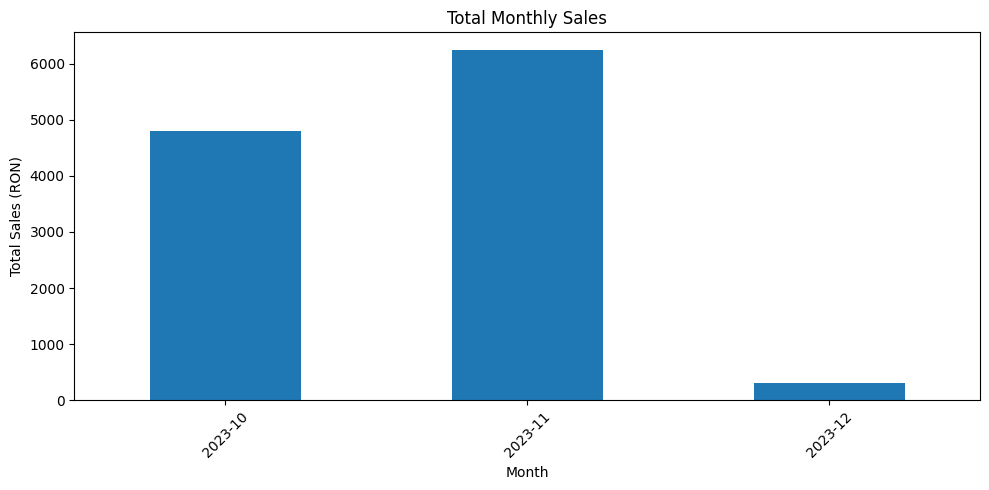

In [ ]:
# --- Example 5: Simple Visualization (Optional) ---
print("\n--- Monthly Sales Visualization ---")

# Ensure the index is a string for plotting
monthly_sales.index = monthly_sales.index.astype(str) 

# Create a figure for the bar chart
plt.figure(figsize=(10, 5))  # Define figure size
monthly_sales.plot(kind='bar', title='Total Monthly Sales')  # Plot as a bar chart
plt.xlabel('Month')  # Set X-axis label
plt.ylabel('Total Sales (RON)')  # Set Y-axis label
plt.xticks(rotation=45)  # Rotate X-axis labels for readability
plt.tight_layout()  # Adjust layout for better fit
# plt.show()  # Uncomment this to display the plot interactively
plt.savefig('../visualizations/monthly_sales.png')  # Save the plot as an image
print("Monthly sales chart saved as 'monthly_sales.png'.")


# Closing the Database Connection

After completing all database-related operations, it is essential to close the connection to the database. This helps release resources and ensures there are no issues with unclosed connections.

### Explanation:
1. **Closing the Connection**:
   - The `conn.close()` command is used to safely terminate the connection to the database.
2. **Confirmation Message**:
   - A confirmation message is printed to inform the user that the connection has been successfully closed.


In [ ]:
# Close connection
conn.close()
print("\nDatabase connection closed.")



Database connection closed.
